# Mushroom Dataset Preprocessing for Assignment 13

## Introduction
In this notebook, I'm going to preprocess the mushroom dataset for use in Assignment 13. My goal is to prepare the dataset by selecting key features, converting categorical data into numerical values, and performing exploratory data analysis. This is in preparation for building a predictive model that determines whether a mushroom is poisonous or edible.

### Step 1: Import Libraries
I'll start by importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset
First, I'll load the dataset.

In [3]:
file_path = r"C:\Users\The King\Desktop\FALL 2024\IS 362\IS362_Assignment13\agaricus-lepiota.data"
df = pd.read_csv(file_path, header=None)

df.columns = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 
    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 
    'spore-print-color', 'population', 'habitat'
]

print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

### Step 3: Data Exploration
I'll perform some data exploration to understand the features better.

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


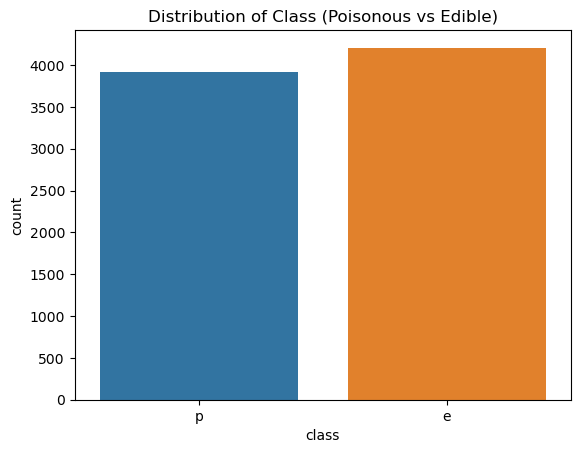

In [4]:
print(df.isna().sum())

sns.countplot(data=df, x='class')
plt.title('Distribution of Class (Poisonous vs Edible)')
plt.show()

### Step 4: Select a Subset of Columns
For this assignment, I'm only using a subset of the columns. Specifically, I'll include the 'class' (edible or poisonous), 'odor', and 'cap-color'.

In [5]:
df_subset = df[['class', 'odor', 'cap-color']]

df_subset.head()

,class,odor,cap-color
0,p,p,n
1,e,a,y
2,e,l,w
3,p,p,w
4,e,n,g


### Step 5: Preprocess Data
I'll convert the categorical columns into numerical ones so that they can be used in the machine learning model.

In [12]:
df_subset = df.copy()

df_subset['class'] = df_subset['class'].map({'p': 1, 'e': 0})
df_subset['class'].fillna(0, inplace=True)

encoded_df = pd.get_dummies(df_subset, drop_first=True)

print(encoded_df.head())

   class  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0      1        False        False        False        False         True   
1      0        False        False        False        False         True   
2      0        False        False        False        False        False   
3      1        False        False        False        False         True   
4      0        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  ...  \
0          False           True          False        False  ...   
1          False           True          False        False  ...   
2          False           True          False        False  ...   
3          False          False           True        False  ...   
4          False           True          False        False  ...   

   population_n  population_s  population_v  population_y  habitat_g  \
0         False          True         False         Fals

### Step 6: Exploratory Data Analysis
I'll explore the distributions of each column and create scatterplots to understand any relationships.

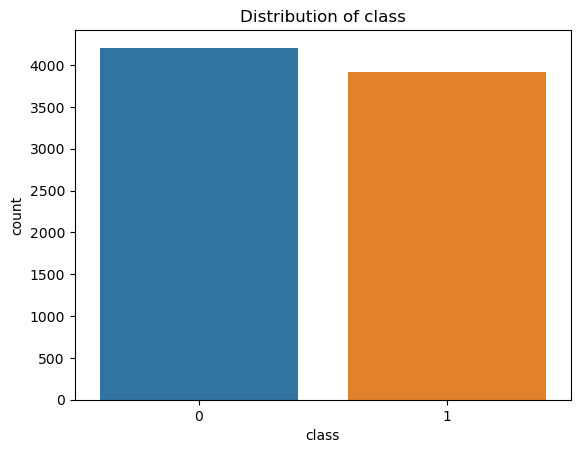

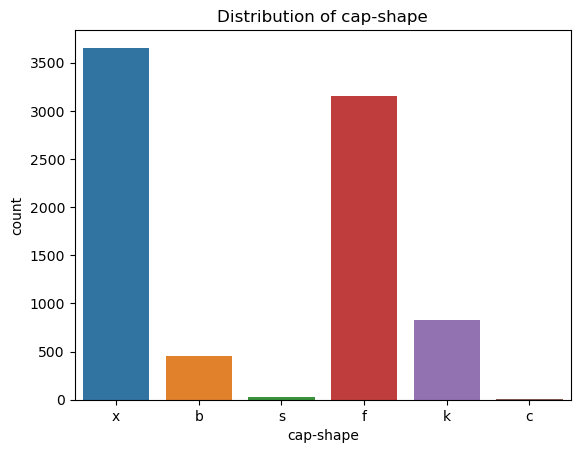

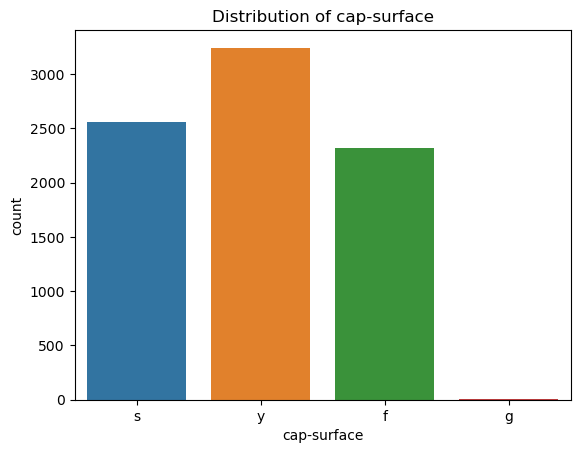

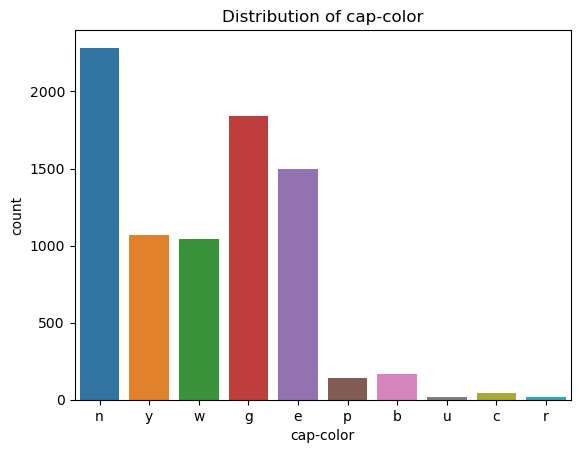

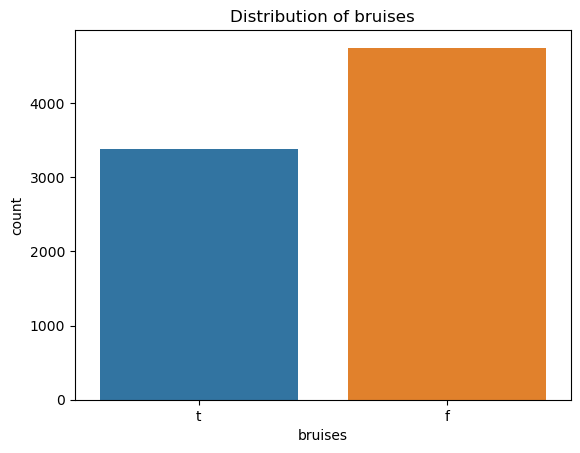

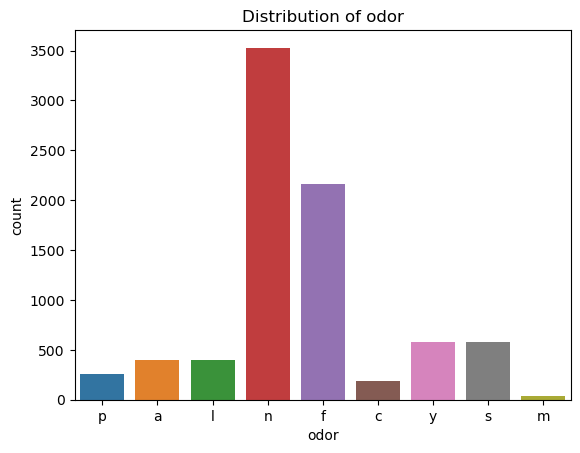

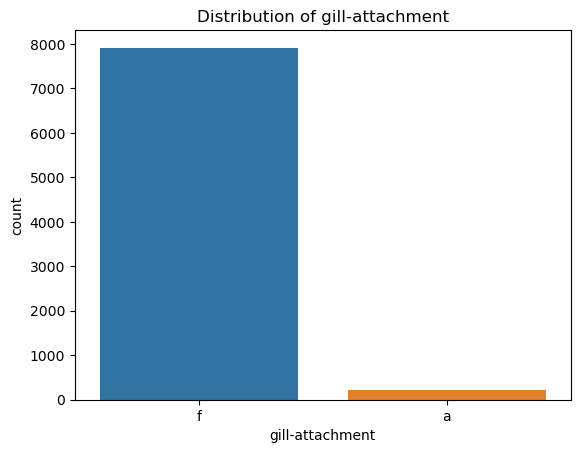

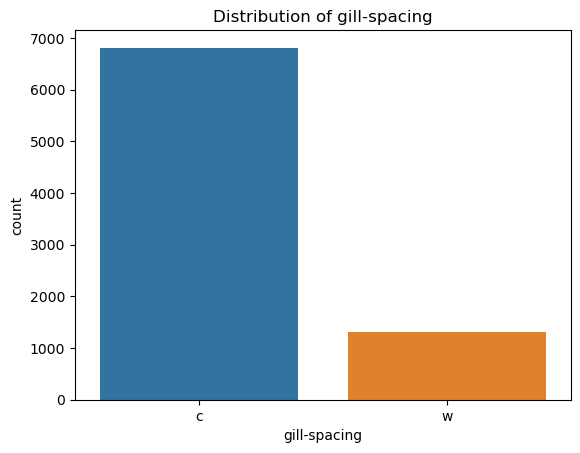

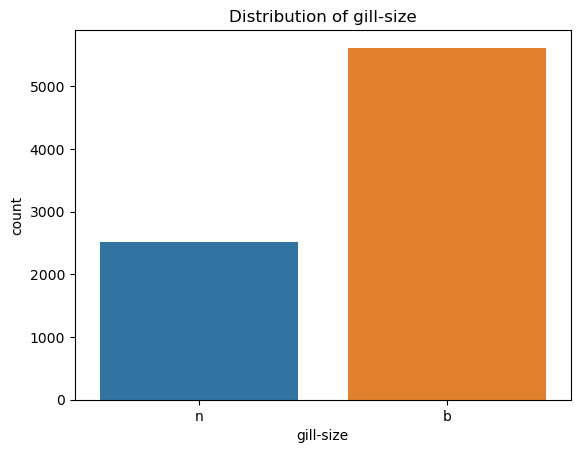

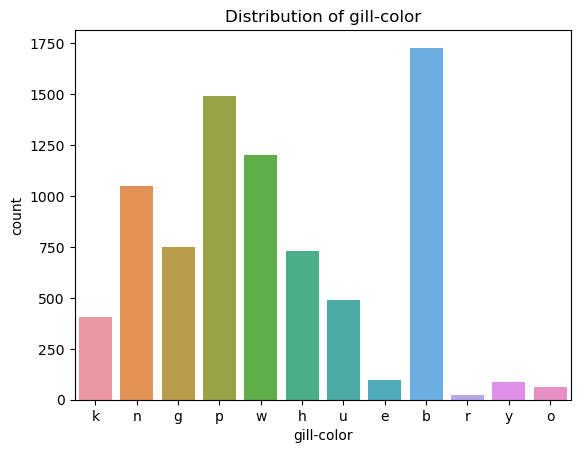

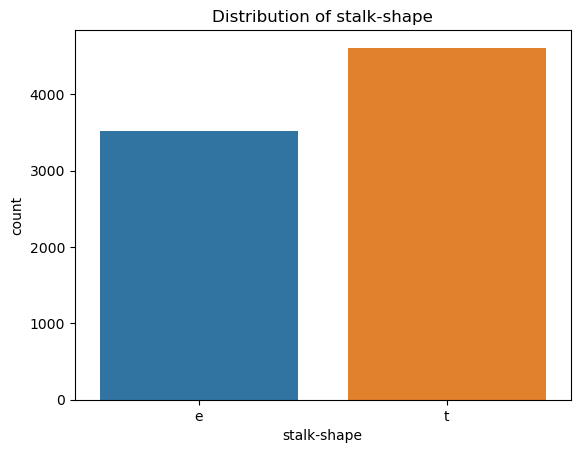

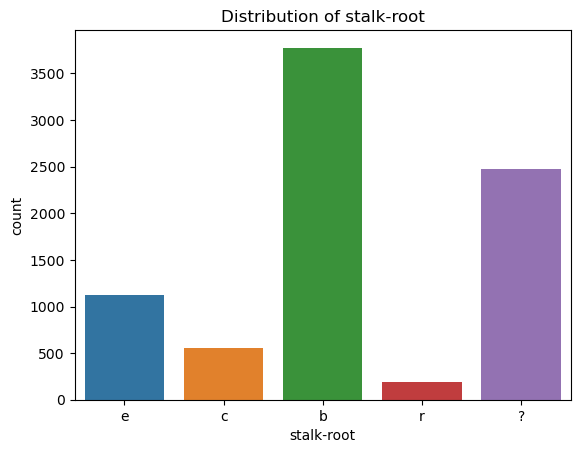

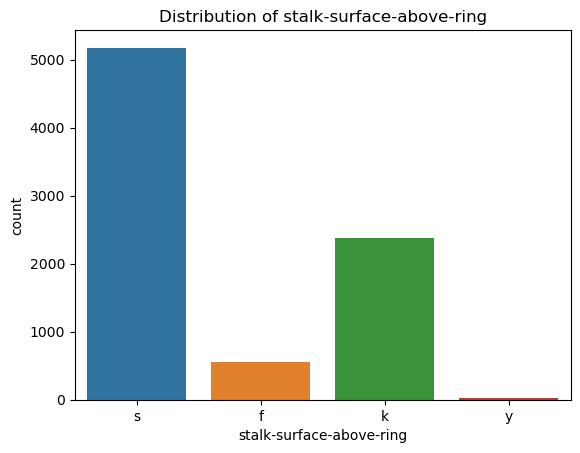

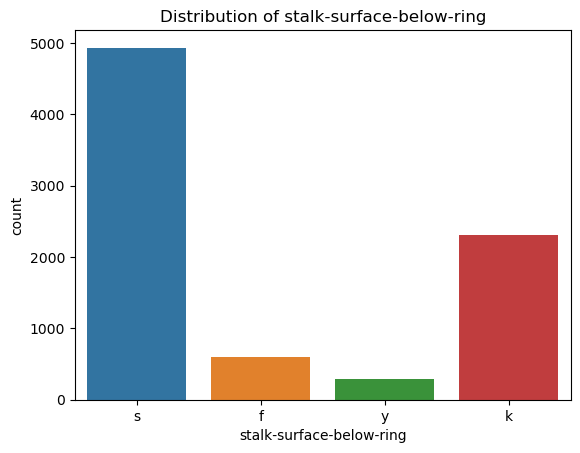

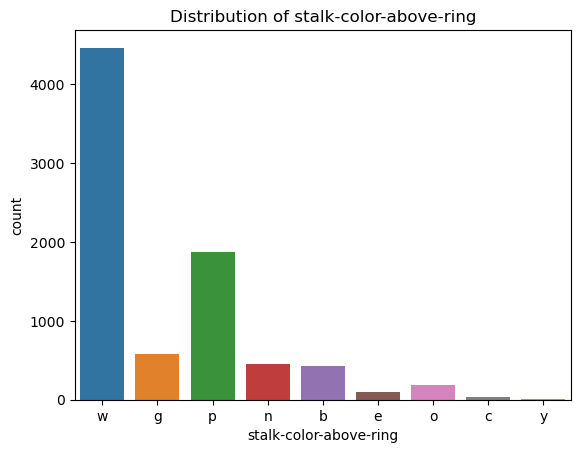

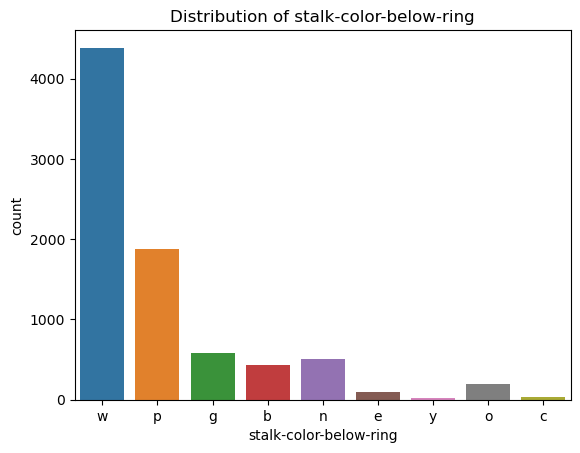

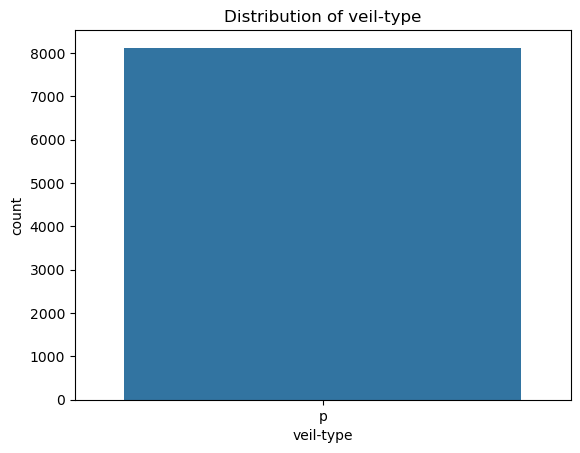

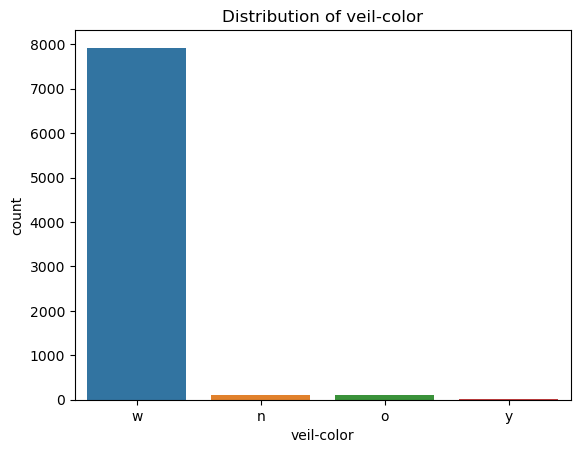

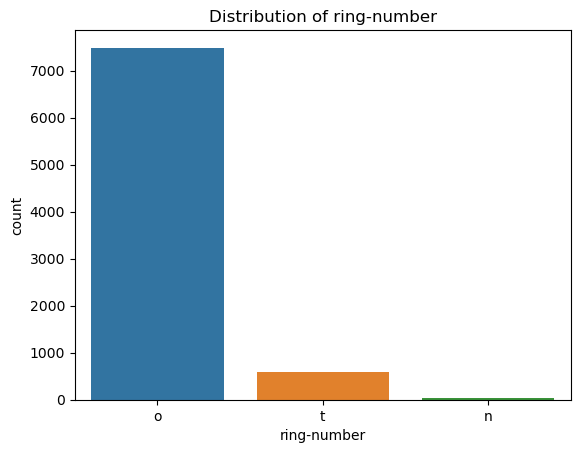

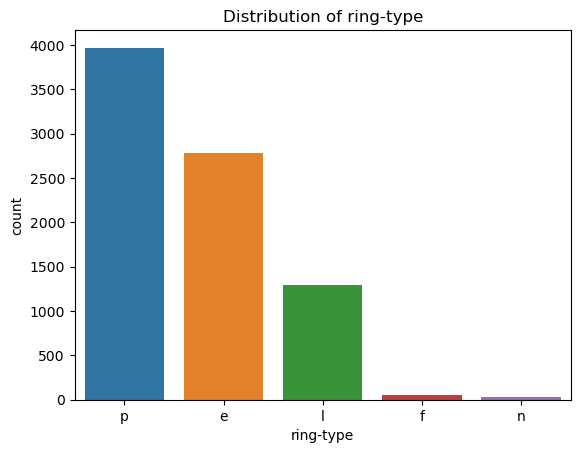

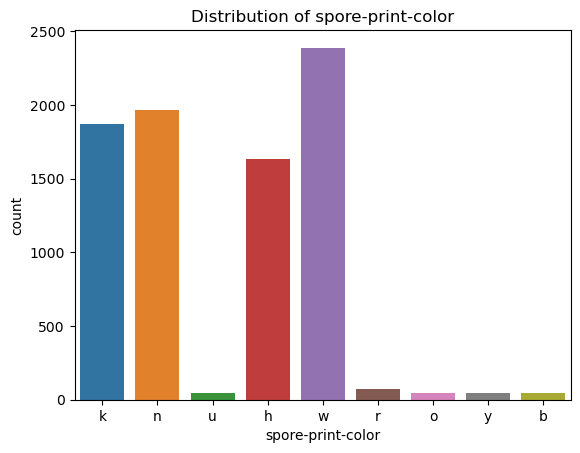

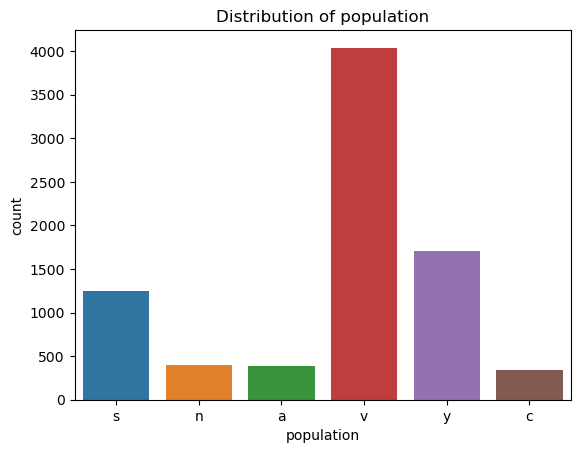

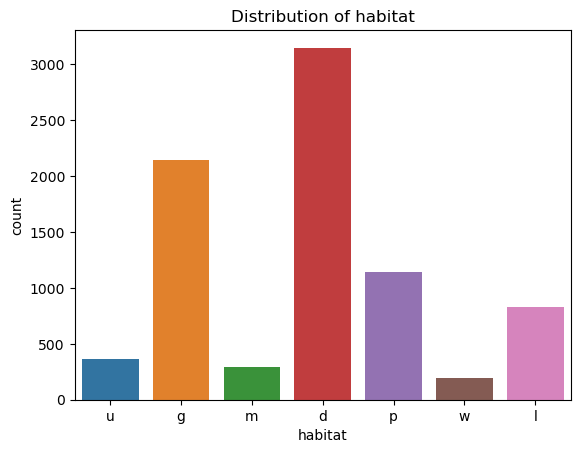

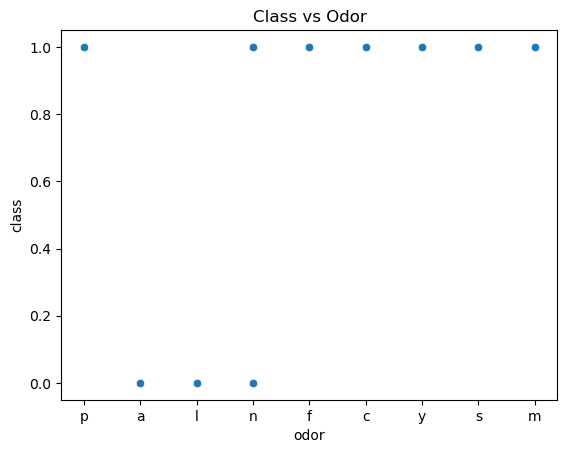

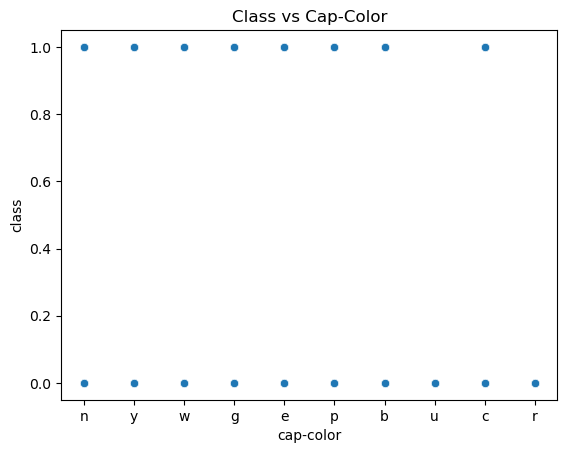

In [13]:
for column in df_subset.columns:
    sns.countplot(data=df_subset, x=column)
    plt.title(f'Distribution of {column}')
    plt.show()

sns.scatterplot(data=df_subset, x='odor', y='class')
plt.title('Class vs Odor')
plt.show()

sns.scatterplot(data=df_subset, x='cap-color', y='class')
plt.title('Class vs Cap-Color')
plt.show()

## Conclusion
The data is now preprocessed and ready for modeling. I've loaded the dataset, selected a subset of relevant columns, explored the features, encoded the categorical data, and performed exploratory data analysis. In the next step, I'll use this preprocessed data to train a predictive model to classify mushrooms as poisonous or edible.